In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os


In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["game_completed", "relative_strength", "score_difference", "home_has_possession", "end.down", "end.distance", "end.yardsToEndzone",  "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [3]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data

training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 4, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 4, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 4, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  Completed processing 2021
Loading data for 2020
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2020
Loading data for 2018
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2018
Loading data for 2016
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2016
Loading data for 2022
skipping  2022
Loading data for 2024
skipping  2024
Loading data for 2023
  Processing 272 CSV files in parallel with 8 workers.

In [4]:
# Define Brier loss function for probability evaluation
def brier_loss(y_true, y_pred):
    """Calculate Brier score - lower is better for probabilistic predictions"""
    return np.mean((y_pred - y_true)**2)


In [5]:
len(training_data[0.05])

2126

In [6]:
modules_to_reload = [
    'models.direct_prediction_network',
    'models.direct_prediction_network_lstm',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

from models.direct_prediction_network_lstm import setup_direct_lstm_models

# Train minimal LSTM models to prevent overfitting on tiny dataset
models = setup_direct_lstm_models(
    training_data, 
    validation_data, 
    features = features,
    num_models=201,           # Number of timestep ranges
    epochs=30,               # Very few epochs to prevent overfitting
    lr=0.001,               # Standard learning rate
    batch_size=32,          # Smaller batches for tiny dataset
    hidden_size=16,         # Minimal hidden size to reduce capacity
    num_layers=1,           # Single layer for simplicity
    bidirectional=False,    # Unidirectional to halve parameters
    use_scaler=True         # Use feature scaling
)


Using provided test data as validation: 3244 train, 526 validation

Training direct prediction LSTM model for timestep range [0.0, 0.005]
Starting training on device: cpu
Early stopping at epoch 17
Best epoch: 12, Train Acc: 0.6609, Train Loss: 0.6213, Val Acc: 0.6483, Val Loss: 0.6399
Restored model from best epoch 12 with val_loss: 0.639877
NFL LSTM model 1/201 completed
Using provided test data as validation: 1142 train, 124 validation

Training direct prediction LSTM model for timestep range [0.005, 0.01]
Starting training on device: cpu
Early stopping at epoch 9
Best epoch: 4, Train Acc: 0.6287, Train Loss: 0.6511, Val Acc: 0.5806, Val Loss: 0.6718
Restored model from best epoch 4 with val_loss: 0.671777
NFL LSTM model 2/201 completed
Using provided test data as validation: 2157 train, 327 validation

Training direct prediction LSTM model for timestep range [0.01, 0.015]
Starting training on device: cpu
Early stopping at epoch 8
Best epoch: 3, Train Acc: 0.6287, Train Loss: 0.6396

Testing timestep 0.000, data shape: (276, 5, 9)
Timestep 0.00%: Test Accuracy = 0.6848, Brier Score = 0.2147
Testing timestep 0.005, data shape: (300, 5, 9)
Timestep 0.50%: Test Accuracy = 0.6833, Brier Score = 0.2144
Testing timestep 0.010, data shape: (281, 5, 9)
Timestep 1.00%: Test Accuracy = 0.6868, Brier Score = 0.2141
Testing timestep 0.015, data shape: (306, 5, 9)
Timestep 1.50%: Test Accuracy = 0.6895, Brier Score = 0.2193
Testing timestep 0.020, data shape: (289, 5, 9)
Timestep 2.00%: Test Accuracy = 0.6955, Brier Score = 0.2183
Testing timestep 0.025, data shape: (315, 5, 9)
Timestep 2.50%: Test Accuracy = 0.6825, Brier Score = 0.2122
Testing timestep 0.030, data shape: (305, 5, 9)
Timestep 3.00%: Test Accuracy = 0.7082, Brier Score = 0.2104
Testing timestep 0.035, data shape: (318, 5, 9)
Timestep 3.50%: Test Accuracy = 0.7075, Brier Score = 0.2105
Testing timestep 0.040, data shape: (336, 5, 9)
Timestep 4.00%: Test Accuracy = 0.6696, Brier Score = 0.2172
Testing timestep 0.

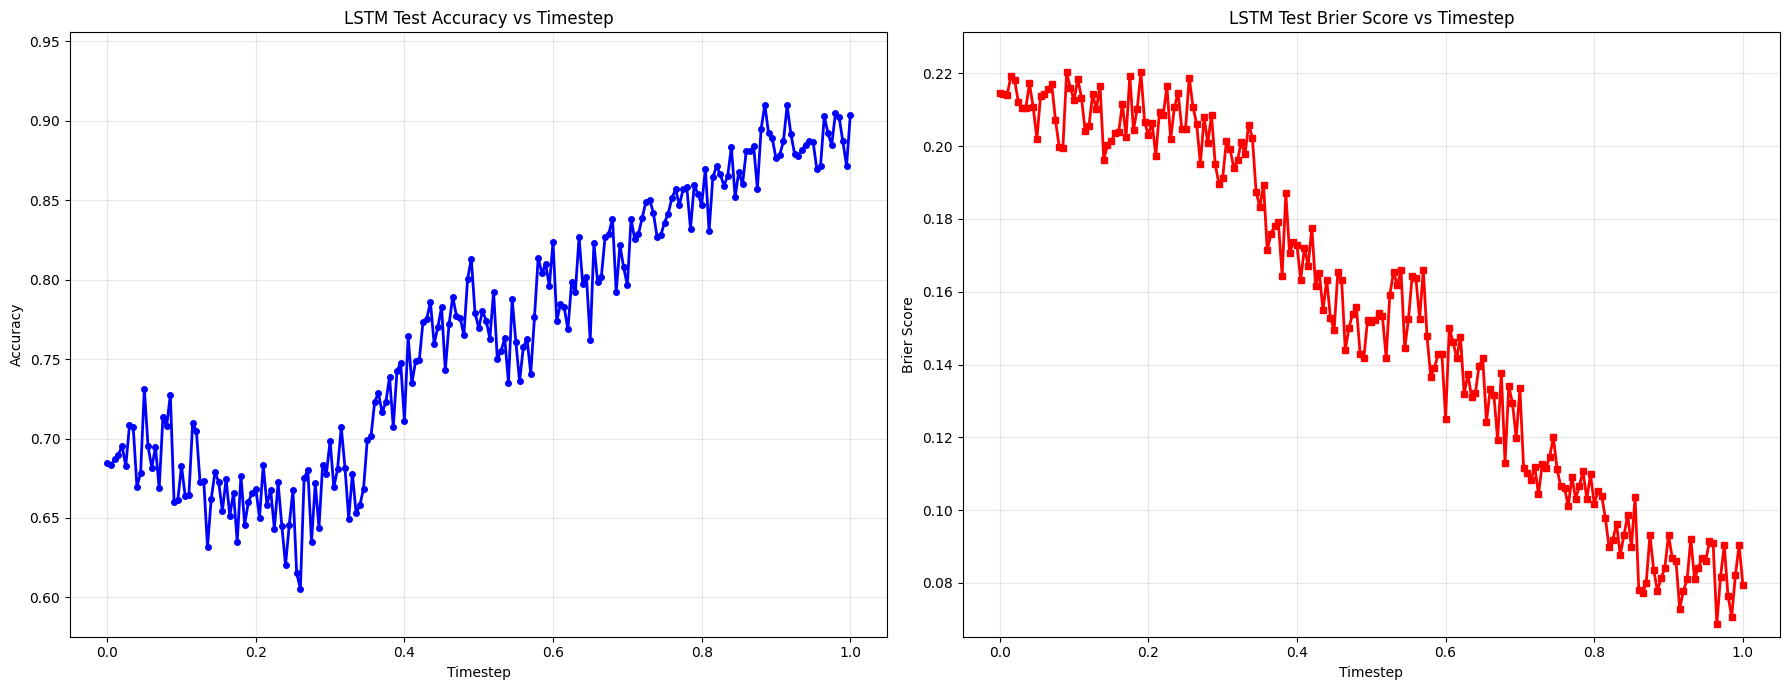


Summary Statistics:
Average Accuracy: 0.7660 ± 0.0834
Average Brier Score: 0.1540 ± 0.0473
Best Accuracy: 0.9101 at timestep 88.50%
Best Brier Score: 0.0686 at timestep 96.50%
Worst Accuracy: 0.6055 at timestep 26.00%
Worst Brier Score: 0.2203 at timestep 9.00%


In [7]:
# Test accuracy and Brier score of model for each timestep on test data and plot
accuracies = []
brier_scores = []
timesteps = []

for timestep in test_data.keys():
    if timestep in models:
        model = models[timestep]
        # Convert test data to array
        y_test = np.array([row["label"] for row in test_data[timestep]])
        X_test = np.array([row["rows"] for row in test_data[timestep]])
        print(f"Testing timestep {timestep:.3f}, data shape: {X_test.shape}")
        
        # Calculate accuracy
        test_accuracy = model.score(X_test, y_test)
        
        # Calculate Brier score
        y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability predictions
        brier_score = brier_loss(y_test, y_test_pred_proba)
        
        print(f"Timestep {timestep:.2%}: Test Accuracy = {test_accuracy:.4f}, Brier Score = {brier_score:.4f}")
        accuracies.append(test_accuracy)
        brier_scores.append(brier_score)
        timesteps.append(timestep)
    else:
        print(f"No model found for timestep {timestep:.3f}")

# Create subplots for both metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot accuracy
ax1.plot(timesteps, accuracies, 'b-o', linewidth=2, markersize=4)
ax1.set_xlabel("Timestep")
ax1.set_ylabel("Accuracy")
ax1.set_title("LSTM Test Accuracy vs Timestep")
ax1.grid(True, alpha=0.3)
ax1.set_ylim([min(accuracies) * 0.95, max(accuracies) * 1.05])

# Plot Brier score
ax2.plot(timesteps, brier_scores, 'r-s', linewidth=2, markersize=4)
ax2.set_xlabel("Timestep")
ax2.set_ylabel("Brier Score")
ax2.set_title("LSTM Test Brier Score vs Timestep")
ax2.grid(True, alpha=0.3)
ax2.set_ylim([min(brier_scores) * 0.95, max(brier_scores) * 1.05])

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Brier Score: {np.mean(brier_scores):.4f} ± {np.std(brier_scores):.4f}")
print(f"Best Accuracy: {np.max(accuracies):.4f} at timestep {timesteps[np.argmax(accuracies)]:.2%}")
print(f"Best Brier Score: {np.min(brier_scores):.4f} at timestep {timesteps[np.argmin(brier_scores)]:.2%}")
print(f"Worst Accuracy: {np.min(accuracies):.4f} at timestep {timesteps[np.argmin(accuracies)]:.2%}")
print(f"Worst Brier Score: {np.max(brier_scores):.4f} at timestep {timesteps[np.argmax(brier_scores)]:.2%}")


In [9]:
from process_data import write_predictions
from sklearn.preprocessing import StandardScaler

# Reload the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

# Write predictions to files for evaluation
scaler = StandardScaler()
write_predictions(models, interpolated_dir, [2024], 4, features, replace_nan_val = 0, phat_b = "lstm_model_phat_b")

# # Model hyperparameter summary
# if models:
#     sample_model = list(models.values())[0]
#     print("\nLSTM Model Configuration:")
#     print(f"Input dimension: {sample_model.model.input_dim}")
#     print(f"Hidden size: {sample_model.model.hidden_size}")
#     print(f"Number of layers: {sample_model.model.num_layers}")
#     print(f"Bidirectional: {sample_model.model.bidirectional}")
#     print(f"Using scaler: {sample_model.use_scaler}")
#     print(f"Device: {sample_model.device}")
    
#     # Count total parameters
#     total_params = sum(p.numel() for p in sample_model.model.parameters())
#     trainable_params = sum(p.numel() for p in sample_model.model.parameters() if p.requires_grad)
#     print(f"\nTotal parameters: {total_params:,}")
#     print(f"Trainable parameters: {trainable_params:,}")
    
#     print(f"\nNumber of models trained: {len(models)}")
#     print("LSTM training complete!")


Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces

In [10]:
import os
import shutil

# Define the ancestor directory and the parent directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Adjust the number of "../" as needed
dest_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Specify the file or directory to copy from the ancestor directory
source = os.path.join(src_dir, "dataset_interpolated_fixed", "2024")  # Replace with the actual name
destination = os.path.join(dest_dir, "test_7", "lstm_model")  # Replace with the desired name

# Perform the copy operation
if os.path.exists(source):
    if os.path.isdir(source):
        shutil.copytree(source, destination)
    else:
        shutil.copy2(source, destination)
    print(f"Copied '{source}' to '{destination}'")
else:
    print(f"Source '{source}' does not exist")

Copied '/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2024' to '/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/test_7/lstm_model'


In [2]:
modules_to_reload = [
    'models.direct_prediction_network',
    'models.direct_prediction_network_lstm',
    'models.utils'
]
for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
from models.direct_prediction_network_lstm import DirectLSTMClassifier

from models.utils import SHAP_analysis

SHAP_analysis(models, 0.9, training_data, test_data)

NameError: name 'sys' is not defined